In [1]:
# Usual suspect
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import sys 
sys.path.insert(1, '../muograph/')
from torch import Tensor

from typing import List, Tuple
from volume.Volume_Interest import VolumeInterest

# <center> **Absorption reconstruction for Cultural Heritage**
    
## 1 - Tracking

In [8]:
def run_and_save_tracking(input_files:Tuple[str],
                          output_files:Tuple[str],
                          voi:VolumeInterest,
                          analysis:str='absorption',
                          E_cut:float=None)->None:
    
    '''
    Convert input hits csv files to tensors. Instanciate the tracking with the hits tensors, given the cut on energy (if provided).
    Then the all instances of the Tracking are saved according to the output file name.
    
    INPUT:
     - input_Files:
     - output_Files:
     - E_cut:float
    '''
    # Muograph
    from utils.read_file import hits_csv_to_tensor
    from tracking.Tracking import Tracking
    from volume.Volume_Interest import VolumeInterest
    
    # Usual suspects
    from fastprogress import progress_bar
    import pickle
    
    for input_file,output_file in progress_bar(zip(input_files,output_files)):
        # get hits
        hits,E = hits_csv_to_tensor(filename=input_files,directory='')
        # run tracking
        tracks = Tracking(hits=hits,voi=voi,analysis=analysis,E=E)
        # save tracking
        with open(output_file,'wb') as f:
            pickle.dump(tracks,f)
        print("Tracking instance saved in {}".format(output_file))

In [ ]:
input_files = ['../data/CHStudy/Muoscope_Absorption3planes_AirTubeWoodStatues_4-1-2016_CRY5Millions.csv',
               '../data/CHStudy/Muoscope_Absorption3planes_FreeSKY_5-1-2016_CRY5Millions.csv']

output_files = ['../data/tracking/Muoscope_Absorption3planes_AirTubeWoodStatues_4-1-2016_CRY5Millions',
               '../data/tracking/Muoscope_Absorption3planes_FreeSKY_5-1-2016_CRY5Millions']


Tracking in progress


Tracking done

Sub-volumes


DONE

Voxel triggering


DONE
assigning voxel's score


computing final voxel's score


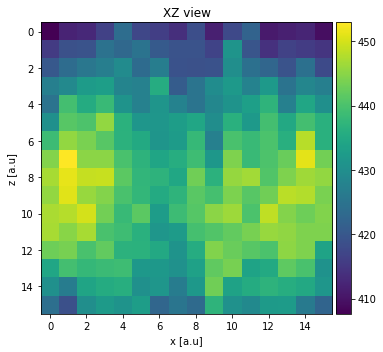

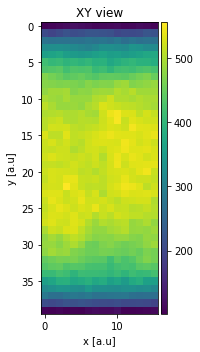

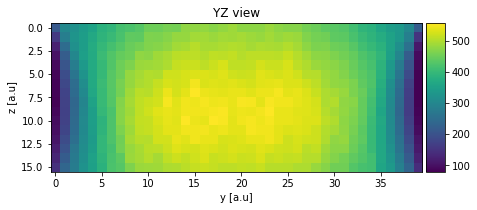

In [2]:
# INPUT FILES
filename='../data/CHStudy/Muoscope_Absorption3planes_AirTubeWoodStatues_4-1-2016_CRY5Millions.csv'

from utils.read_file import hits_csv_to_tensor
hits,E = hits_csv_to_tensor(filename=filename,directory='')

# OUTPUT DIRECTORY
import pickle
output_dir = '../data/wooden_statue_water/transmission/'

# VOI
from volume.Volume_Interest import VolumeInterest
VOI = VolumeInterest(position = [0,0,400],dimension=[800,2000,800],voxel_width=50)

# Tracking
hits_cut = hits[:,:,E<600]
from tracking.Tracking import Tracking
tracks = Tracking(hits=hits_cut,voi=VOI,analysis='absorption',E=E)
# Save
with open(output_dir+'tracks', 'wb') as f:
    pickle.dump(tracks,f)

# Absorption reconstruction
from reconstruction.absorption import AbsorbtionReconstruction
transmition = AbsorbtionReconstruction(tracks=tracks)
# Save
with open(output_dir+'absorption_reconstruction', 'wb') as f:
    pickle.dump(transmition,f)
    
# Scores computation
def sum_list(vox_list:List) -> int:
    """
    Return the sum of the input list
    """
    return np.sum(np.array(vox_list))

score_list = transmition.generate_score_list()
score_list,n_true = transmition.assign_score_voxel(score_list=score_list,
                                                   score_feature=torch.ones_like(tracks.events),
                                                   masks = None)

final_scores = transmition.compute_final_voxel_score(score_list=score_list,
                                             score_method=sum_list,
                                             quartile=None)

# Save scoresfinal_scores_free
with open(output_dir+'scores', 'wb') as f:
    pickle.dump(final_scores,f)
    
    
from plotting.Plotting import plot_VOI_pred
plot_VOI_pred(preds=final_scores, filename=output_dir+"scores_plot")

In [9]:
df = pd.read_csv("../data/CHStudy/Muoscope_Absorption3planes_AirTubeWoodStatues_4-1-2016_CRY5Millions.csv")
df.head()

,Event,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,E
0,0,682.465,-838.686,-799.5,681.158,-842.928,-899.5,679.8520,-847.168,-999.5,2075.260
1,2,177.338,618.090,-799.5,109.477,623.956,-899.5,41.6203,629.818,-999.5,677.563
2,3,-942.982,770.465,-799.5,-953.800,752.922,-899.5,-964.6190,735.380,-999.5,19457.500
3,4,589.909,-778.362,-799.5,621.630,-769.832,-899.5,653.3500,-761.301,-999.5,9634.320
4,6,942.513,-207.603,-799.5,980.585,-233.750,-899.5,1018.6600,-259.894,-999.5,2403.090



Tracking in progress


Tracking done

Sub-volumes


DONE

Voxel triggering


DONE
assigning voxel's score


computing final voxel's score


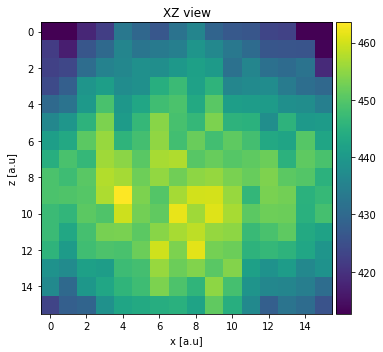

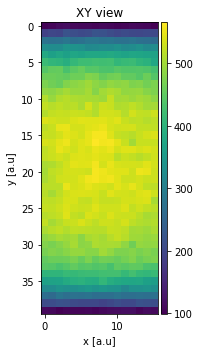

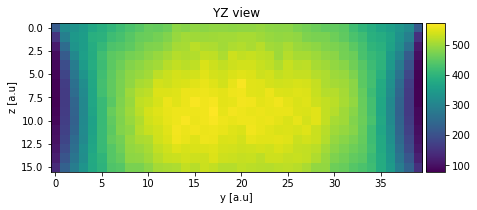

In [2]:
# INPUT FILES
filename='../data/CHStudy/Muoscope_Absorption3planes_FreeSKY_5-1-2016_CRY5Millions.csv'

from utils.read_file import hits_csv_to_tensor
hits,E = hits_csv_to_tensor(filename=filename,directory='')

# OUTPUT DIRECTORY
import pickle
output_dir = '../data/wooden_statue_water/free_sky/'

# VOI
from volume.Volume_Interest import VolumeInterest
VOI = VolumeInterest(position = [0,0,400],dimension=[800,2000,800],voxel_width=50)

# Tracking
hits_cut = hits[:,:,E<600]
from tracking.Tracking import Tracking
tracks = Tracking(hits=hits_cut,voi=VOI,analysis='absorption',E=E)
# Save
with open(output_dir+'tracks', 'wb') as f:
    pickle.dump(tracks,f)

# Absorption reconstruction
from reconstruction.absorption import AbsorbtionReconstruction
transmition = AbsorbtionReconstruction(tracks=tracks)
# Save
with open(output_dir+'absorption_reconstruction', 'wb') as f:
    pickle.dump(transmition,f)
    
# Scores computation
def sum_list(vox_list:List) -> int:
    """
    Return the sum of the input list
    """
    return np.sum(np.array(vox_list))

score_list = transmition.generate_score_list()
score_list,n_true = transmition.assign_score_voxel(score_list=score_list,
                                                   score_feature=torch.ones_like(tracks.events),
                                                   masks = None)

final_scores = transmition.compute_final_voxel_score(score_list=score_list,
                                             score_method=sum_list,
                                             quartile=None)

# Save scores
with open(output_dir+'scores', 'wb') as f:
    pickle.dump(final_scores,f)
    
    
from plotting.Plotting import plot_VOI_pred
plot_VOI_pred(preds=final_scores, filename=output_dir+"scores_plot")

In [4]:
with open("../data/wooden_statue_water/transmission/scores", "rb") as f:
    transmission = pickle.load(f)
    
with open("../data/wooden_statue_water/free_sky/scores", "rb") as f:
    free_sky = pickle.load(f)

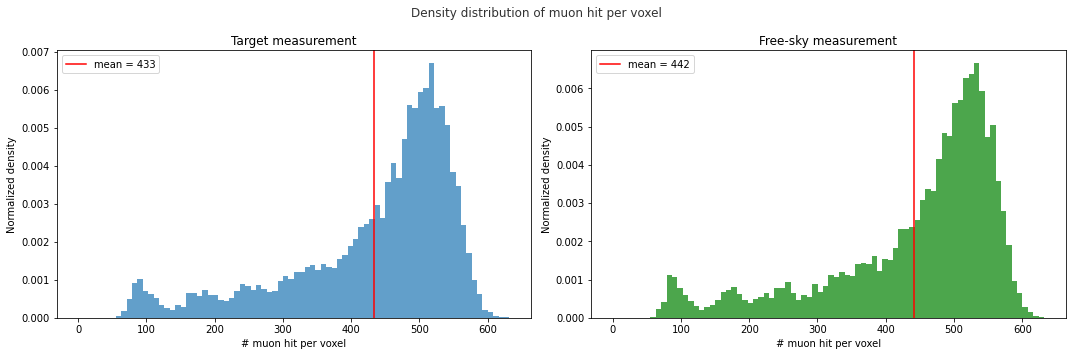

VOI volume = 1280000.0 cm3, 1.28 m3
Total number of hit voxels = 4536267 for free sky, 4442732 for target
Number of hit per cm3 = 3.47
Number of hit per voxel (target measurement)= 433.86
Number of hit per voxel (free sky measurement)= 442.99


In [5]:
from plotting.Plotting import plot_lumuosity_summary
plot_lumuosity_summary(transmission,free_sky,VOI)

torch.Size([16, 40, 16])


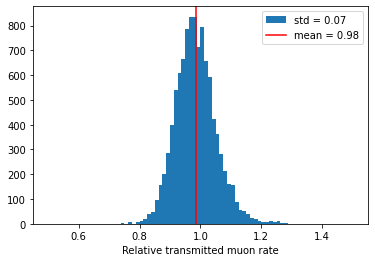

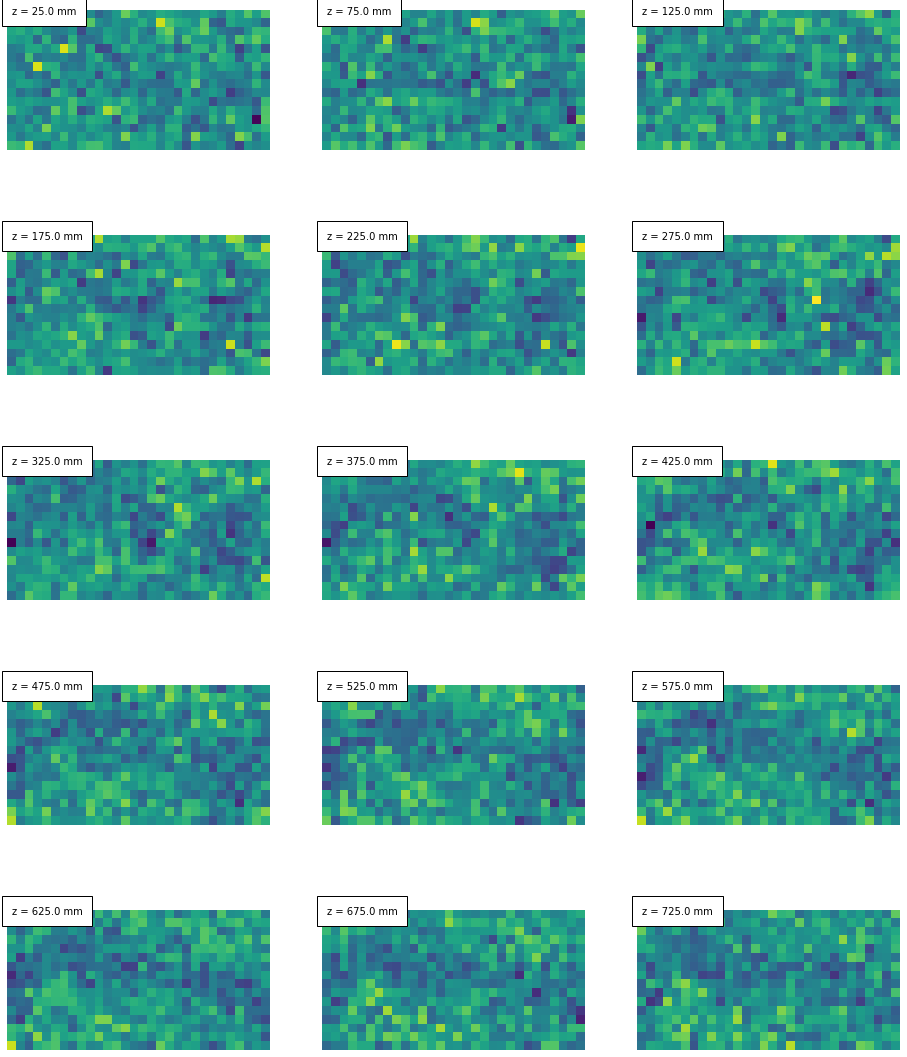

In [12]:
ratio = transmission/free_sky
print(ratio.size())

mean = ratio.ravel().mean()
std = ratio.ravel().std()

fig,ax =plt.subplots()
ax.hist(ratio.ravel(),bins=80,range=(0.5,1.5),label='std = {:.2f}'.format(std))
xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()
ax.axvline(x = mean,color='red',label='mean = {:.2f}'.format(mean))
ax.set_xlabel("Relative transmitted muon rate")
ax.legend()
plt.show()

from plotting.Plotting import imshow_transmission_rate

fig,ax = plt.subplots(nrows=int(len(ratio[0,0,:])/3),ncols=3,figsize=(16,20))
ax = ax.ravel()
for i in range(len(ratio[0,0])-1):
    # imshow_transmission_rate(ratio[:,5:-5],fig=fig,main_ax=ax[i],VOI=VOI,fontsize=0,only_imshow=True,z_slice=i)
    imshow_transmission_rate(ratio[:,5:-5],fig=fig,main_ax=ax[i],VOI=VOI,fontsize=0,only_imshow=True,z_slice=i)    

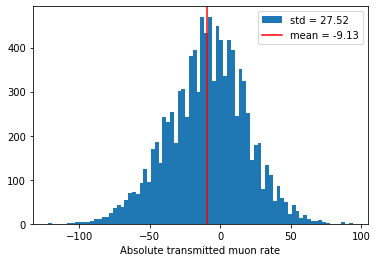

IndexError: index 15 is out of bounds for axis 0 with size 15

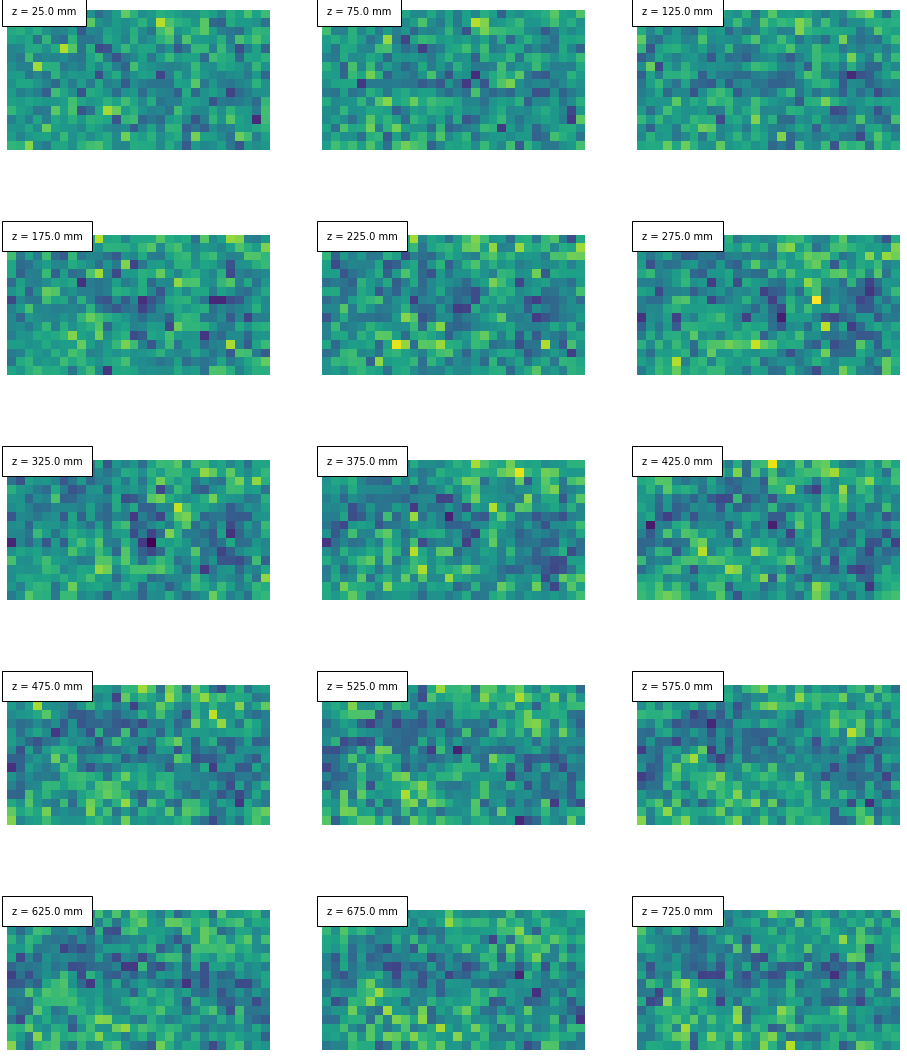

In [7]:
diff = transmission-free_sky

mean = diff.ravel().mean()
std = diff.ravel().std()

fig,ax =plt.subplots()
ax.hist(diff.ravel(),bins=80,label='std = {:.2f}'.format(std))
ax.axvline(x = mean,color='red',label='mean = {:.2f}'.format(mean))
ax.set_xlabel("Absolute transmitted muon rate")
ax.legend()
plt.show()

from plotting.Plotting import imshow_transmission_rate

fig,ax = plt.subplots(nrows=int(len(ratio[0,0,:])/3),ncols=3,figsize=(16,20))
ax = ax.ravel()
for i in range(len(ratio[0,0,:])):
    imshow_transmission_rate(diff[:,5:-5],fig=fig,main_ax=ax[i],VOI=VOI,fontsize=0,only_imshow=True,z_slice=i)
# plot_transmission_score_slices(transmission=diff,VOI=VOI)

In [ ]:
relat_diff = (transmission-free_sky)/free_sky

mean = relat_diff.ravel().mean()
std = relat_diff.ravel().std()

fig,ax =plt.subplots()
ax.hist(relat_diff.ravel(),bins=80,label='std = {:.2f}'.format(std),range=(-.5,.5))
ax.axvline(x = mean,color='red',label='mean = {:.2f}'.format(mean))
ax.set_xlabel("Relative difference transmitted muon rate")
ax.legend()
plt.show()

fig,ax = plt.subplots(nrows=int(len(relat_diff[0,0,:])/3),ncols=3,figsize=(16,20))
ax = ax.ravel()

for i in range(len(relat_diff[0,0,:])):
    
    imshow_transmission_rate(relat_diff[:,5:-5],fig=fig,main_ax=ax[i],VOI=VOI,fontsize=0,only_imshow=True,z_slice=i)
    
    
# plot_transmission_score_slices(transmission=relat_diff,VOI=VOI)

In [ ]:
def plot_VOI_pred_new(preds:Tensor, true:Tensor=None,filename:str=None)->None:

    from mpl_toolkits.axes_grid1 import make_axes_locatable

    scoresXZ = torch.transpose(torch.sum(preds,dim=1)/preds.size()[1],0,1)
    scoresXY = torch.transpose(torch.sum(preds,dim=2)/preds.size()[2],0,1)
    scoresYZ = torch.transpose(torch.sum(preds,dim=0)/preds.size()[0],0,1)


    fig1,ax=plt.subplots(nrows=1, ncols=1,figsize=(6.6,5))
    ax.set_title('XZ view')
    ax.set_xlabel('x [a.u]')
    ax.set_ylabel('z [a.u]')
    im = ax.imshow(scoresXZ,cmap='viridis',origin="lower")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig1.colorbar(im, ax=ax,cax=cax)
    plt.tight_layout()
    if(filename is not None):
        plt.savefig(filename+'_XZ_view')
    plt.show()

    fig1,ax=plt.subplots(nrows=1, ncols=1,figsize=(6.6,5))
    ax.set_title('XY view')
    ax.set_xlabel('x [a.u]')
    ax.set_ylabel('y [a.u]')
    im = ax.imshow(scoresXY,cmap='viridis')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig1.colorbar(im, ax=ax,cax=cax)
    plt.tight_layout()
    if(filename is not None):
        plt.savefig(filename+'_XY_view')
    plt.show()

    fig1,ax=plt.subplots(nrows=1, ncols=1,figsize=(6.6,5))
    ax.set_title('YZ view')
    ax.set_xlabel('y [a.u]')
    ax.set_ylabel('z [a.u]')
    im = ax.imshow(scoresYZ,cmap='viridis')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig1.colorbar(im, ax=ax,cax=cax)
    plt.tight_layout()
    if(filename is not None):
        plt.savefig(filename+'_YZ_view')
    plt.show()


# Reconstruction


## Muon hit density

In photography, luminosity (a.k.a the number of photon collected) drives the quality of the reconstructed image. It is impossible to take a picture of a car detecting only 1000 photons. We need every part of the car to interact with the detected photons in order to extract information from them.

Applying the same reasonning to muography, we could define a "lumuosity" which would define how exposed to muons the volume is. **Example**:

- $1$ million muons and $1\text{m}^3$ statue -> good lumuosity! (1 $\mu/\text{cm}^3$) 
- $1$ k muons and $10\text{m}^3$ statue -> no lumuosity! (0.001 $\mu/\text{cm}^3$)

The **backprojection-ASR** algorithm **counts** the number of **hit voxel per event**, given a muon **track** and a **voxelized volume** of interest: e.g a reconstructed track going throught 10 different voxel will trigger all of them. Thus, this muon generates a total of 10 voxel hits (1 per voxel).

Once we run the backprojection algorithm, we can compute the density of muon hit per voxel (a.k.a how many times voxels have been hit by a muon). This distribution can be used as a proxy for "lumuosity".

**Example**:

- **Average # muon hit per voxel**: 256
- **Total # muon hit per volume**: 2.05

These figure of merit must be implemented in a new analysis class! which would take as input both transmission and free sky backprojection-ASR results.


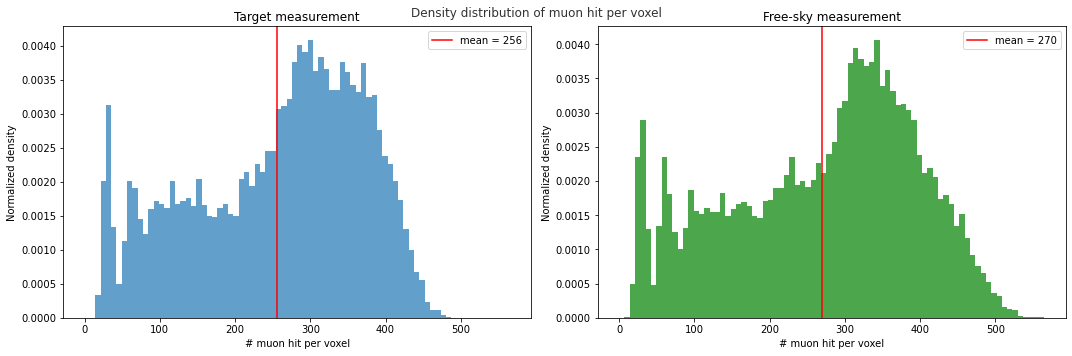

VOI volume = 1920000.0 cm3, 1.92 m3
Total number of hit voxels = 4150964 for free sky, 3942230 for target
Number of hit per cm3 = 2.05
Number of hit per voxel (target measurement)= 256.66
Number of hit per voxel (free sky measurement)= 270.25


In [9]:
from plotting.Plotting import plot_lumuosity_summary
plot_lumuosity_summary(transmission,free_sky,VOI)

## Transmission - absorbtion power

We can have a look at the absorbtion power, a.k.a how many muons have been absorbed? Based on We can compute 3 things:

 - Ratio: Simply the ratio between measured and free-sky flux. (It is used in MURAVES, and most tramsition based muography experiments).
 
 - Diff: The difference between measured and free-sky flux. It should be bad because muon flux has a theta dependance!!
 
 - Diff-Ratio: The difference between measured and free-sky flux, divided by free sky.
 
### Ratio

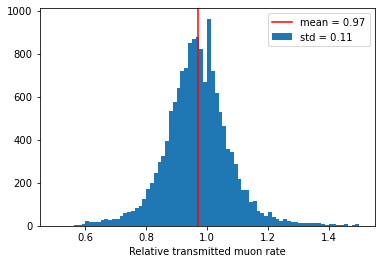

In [41]:
ratio = transmission/free_sky

mean = ratio.ravel().mean()
std = ratio.ravel().std()

fig,ax =plt.subplots()
ax.hist(ratio.ravel(),bins=80,range=(0.5,1.5),label='std = {:.2f}'.format(std))
xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()
ax.axvline(x = mean,color='red',label='mean = {:.2f}'.format(mean))
ax.set_xlabel("Relative transmitted muon rate")
ax.legend()
plt.show()

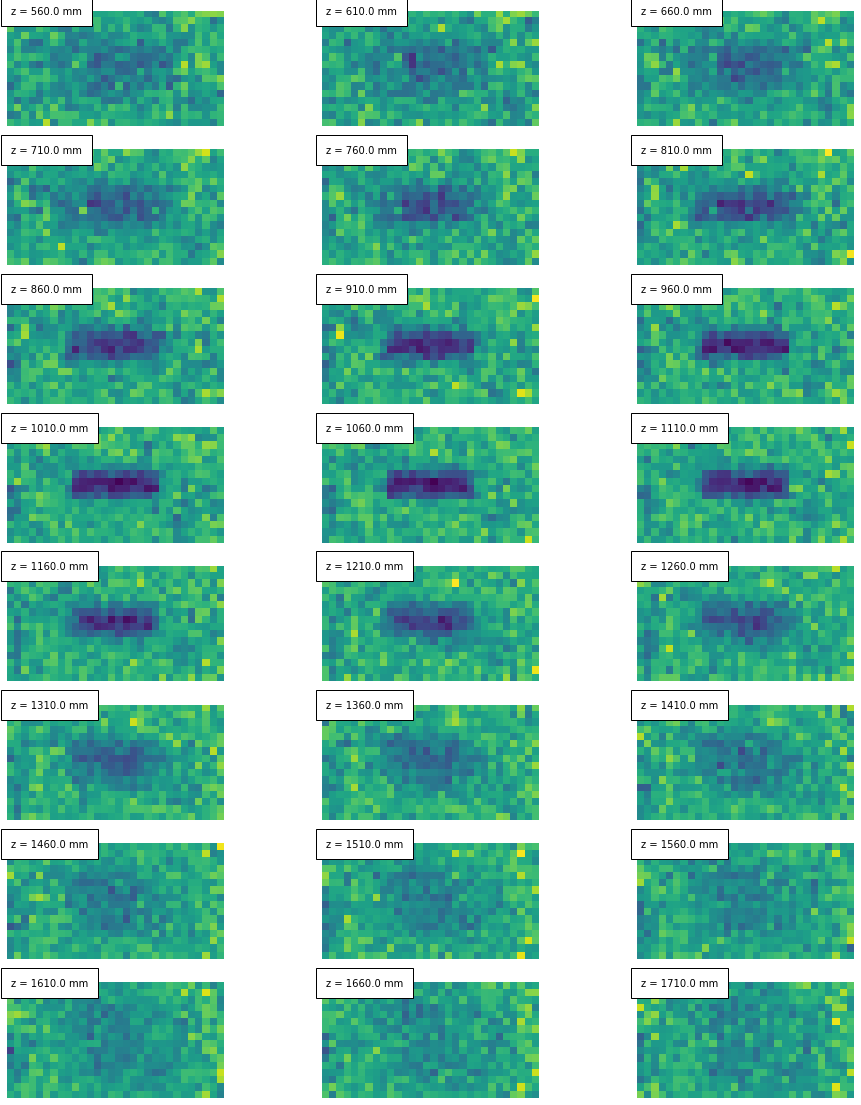

In [43]:
# def plot_transmission_score_slices(transmission:Tensor) -> None:
    
#     r"""
#     Plot the transmission score of a voxelized VOI.
    
#     INPUT:
#      - VOI:VolumeInterest The voxelized volume of interest used for tracking and reconstruction.
#      - transmission: Tensor with size (n_vox_x,n_vox_y,n_vox_z) containing the scores of the reconstruction.
     
#     NOTE: this function requires the imshow_transmission_rate method.
#     """
    
#     fig,ax = plt.subplots(nrows=int(len(ratio[0,0,:])/3),ncols=3,figsize=(16,20))
#     ax = ax.ravel()
#     for i in range(len(ratio[0,0,:])):
#         imshow_transmission_rate(1/ratio[:,:],fig=fig,main_ax=ax[i],VOI=VOI,fontsize=0,only_imshow=True,z_slice=i)    

# from plotting.Plotting import plot_transmission_score_slices
# plot_transmission_score_slices(transmission=ratio,VOI=VOI)

from plotting.Plotting import imshow_transmission_rate

fig,ax = plt.subplots(nrows=int(len(ratio[0,0,:])/3),ncols=3,figsize=(16,20))
ax = ax.ravel()
for i in range(len(ratio[0,0,:])):
    imshow_transmission_rate(ratio[:,5:-5],fig=fig,main_ax=ax[i],VOI=VOI,fontsize=0,only_imshow=True,z_slice=i)


## Diff

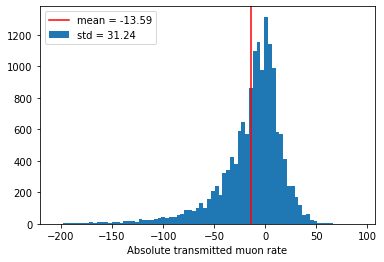

In [25]:
diff = transmission-free_sky

mean = diff.ravel().mean()
std = diff.ravel().std()

fig,ax =plt.subplots()
ax.hist(diff.ravel(),bins=80,label='std = {:.2f}'.format(std))
ax.axvline(x = mean,color='red',label='mean = {:.2f}'.format(mean))
ax.set_xlabel("Absolute transmitted muon rate")
ax.legend()
plt.show()

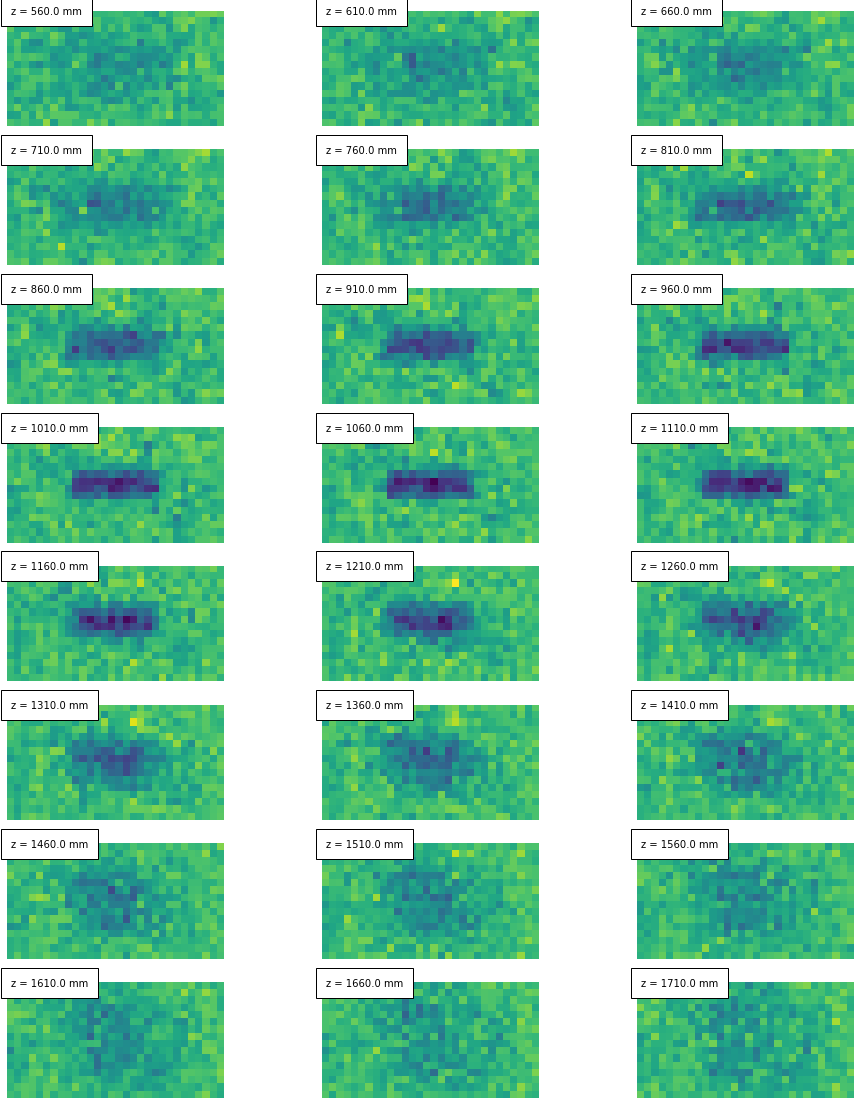

In [45]:
from plotting.Plotting import imshow_transmission_rate

fig,ax = plt.subplots(nrows=int(len(ratio[0,0,:])/3),ncols=3,figsize=(16,20))
ax = ax.ravel()
for i in range(len(ratio[0,0,:])):
    imshow_transmission_rate(diff[:,5:-5],fig=fig,main_ax=ax[i],VOI=VOI,fontsize=0,only_imshow=True,z_slice=i)
# plot_transmission_score_slices(transmission=diff,VOI=VOI)

## Relative difference

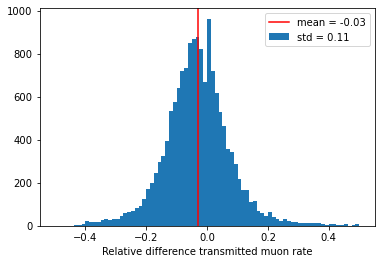

In [36]:
relat_diff = (transmission-free_sky)/free_sky

mean = relat_diff.ravel().mean()
std = relat_diff.ravel().std()

fig,ax =plt.subplots()
ax.hist(relat_diff.ravel(),bins=80,label='std = {:.2f}'.format(std),range=(-.5,.5))
ax.axvline(x = mean,color='red',label='mean = {:.2f}'.format(mean))
ax.set_xlabel("Relative difference transmitted muon rate")
ax.legend()
plt.show()

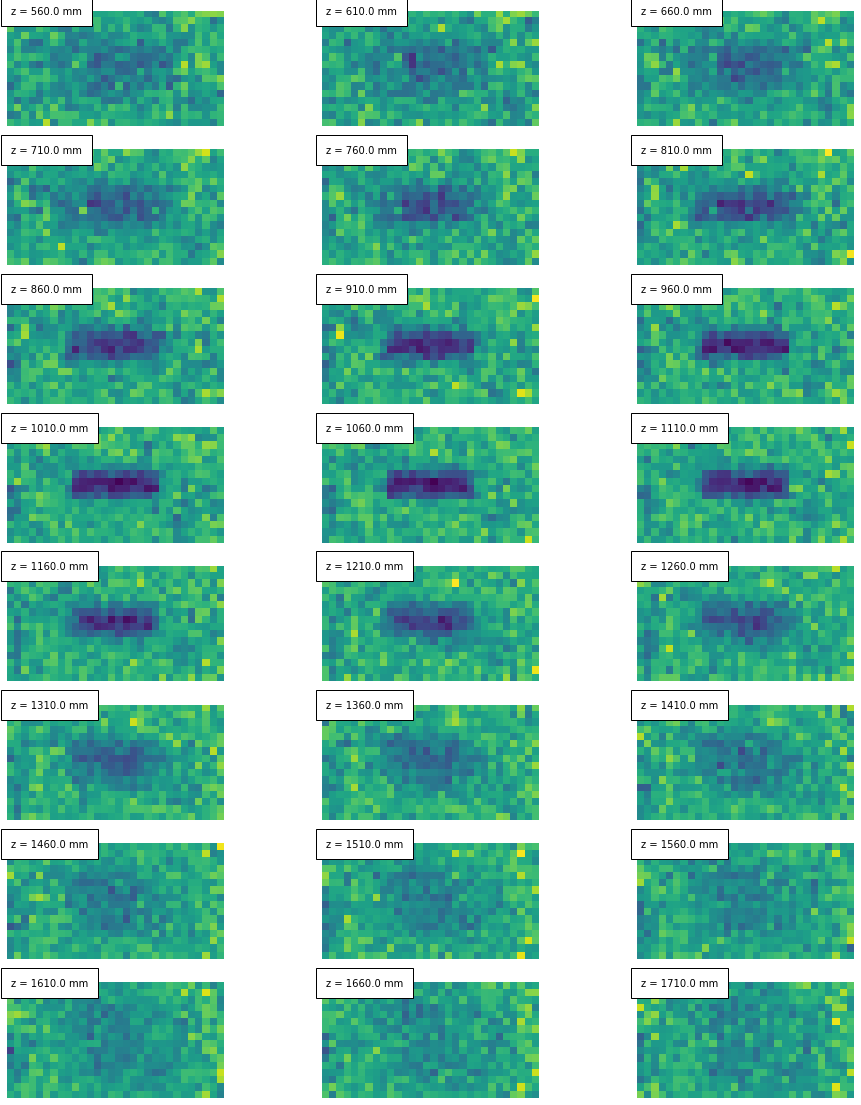

In [46]:
fig,ax = plt.subplots(nrows=int(len(relat_diff[0,0,:])/3),ncols=3,figsize=(16,20))
ax = ax.ravel()

for i in range(len(relat_diff[0,0,:])):
    
    imshow_transmission_rate(relat_diff[:,5:-5],fig=fig,main_ax=ax[i],VOI=VOI,fontsize=0,only_imshow=True,z_slice=i)
    
    
# plot_transmission_score_slices(transmission=relat_diff,VOI=VOI)

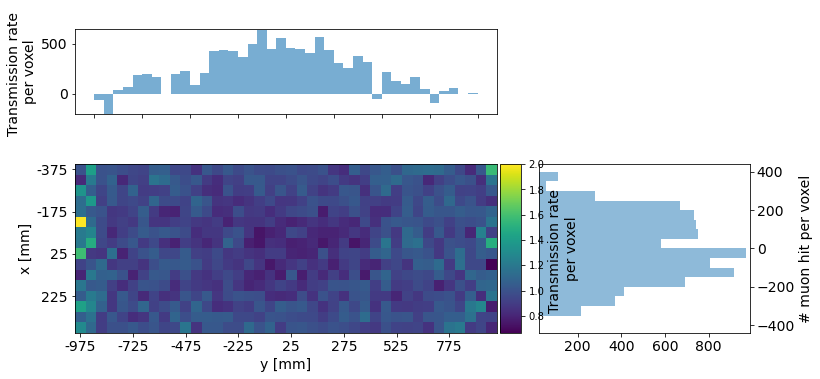

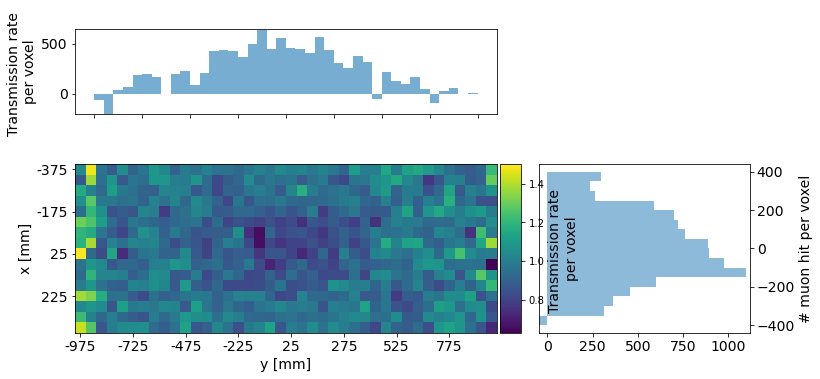

In [89]:
final_scores = diff

from volume.Volume_Interest import VolumeInterest
VOI = VolumeInterest(position = [0,0,1135],dimension=[800,2000,1200],voxel_width=50)

# for i in range(VOI.n_vox_xyz[2]):
for i in range(2):

# XY view
    fig,main_ax = plt.subplots(figsize=(8, 8))

    imshow_transmission_rate(ratio[:,:,i],fig=fig,main_ax=main_ax,VOI=VOI)

    # X view
    x_hist = main_ax.inset_axes([0, 1.3, 1, .5], transform=main_ax.transAxes)  
    bin_height = final_scores[:,:,1].sum(dim=0).numpy()
    bin_center = VOI.voxel_centers[0,:,0,1].numpy()
    x_hist.set_ylim(min(bin_height),max(bin_height)+max(bin_height)/50)
    x_hist.bar(bin_center,bin_height,width=(VOI.vox_width),alpha=.6)
    x_hist.set_ylabel('Transmission rate \nper voxel',fontsize=14)
#     x_hist.set_xlabel('Voxel $x$ position [mm]',fontsize=14)
    # Ticks
    x_hist.xaxis.set_tick_params(labelbottom=False)
    x_hist.xaxis.set_tick_params(labeltop=False)
    
    # x_hist.set_tick_params(labelleft=False)
    x_hist.tick_params(axis='x', labelsize=14)
    x_hist.tick_params(axis='y', labelsize=14)

    # # Y view
    y_hist = main_ax.inset_axes([1.1, 0, .5, 1], transform=main_ax.transAxes)

    bin_height = final_scores[:,:,i].sum(dim=1).numpy()
    bin_center = VOI.voxel_centers[:,0,0,0].numpy()
    y_hist.set_xlim(min(bin_height),max(bin_height)+max(bin_height)/50)
    y_hist.barh(bin_center,bin_height,height=VOI.vox_width,alpha=.5)
    y_hist.set_ylabel('# muon hit per voxel',fontsize=14)

    y_hist.yaxis.set_label_position("right")
    y_hist.yaxis.tick_right()
    y_hist.tick_params(axis='x', labelsize=14)
    y_hist.tick_params(axis='y', labelsize=14)



    plt.show()